# DATASET LINK - https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

# PRESENTATION VIDEO LINK - https://www.youtube.com/watch?v=omIXfZmI8Rs

# Seoul Bike Sharing Demand Prediction Project

With cities growing smarter and greener, bike-sharing has become a key part of sustainable urban transport. It's affordable, convenient, and eco-friendly — and in Seoul, it’s already a big part of how people get around.

But as more people rely on these bikes, a new challenge shows up: demand can be unpredictable. Some days bikes are everywhere, other days the docks are empty. That’s what led me to ask this:

**Can we predict bike rental demand accurately — using just weather and calendar data?**

If we can, it opens up a lot of opportunities: better planning, fewer empty docks, smarter staff scheduling, and even targeted promotions. So I decided to dive in and see what the data could tell me.

---

#### Project Objective

My main goal here was to build a machine learning model that could predict how many bikes would be rented at a given hour in Seoul.

But honestly, this wasn’t just about the model. I wanted to understand **why** people rent bikes — what patterns show up with time, temperature, or holidays? And can we turn those patterns into something useful?

So through this project, I set out to:

- Explore how factors like temperature, holidays, and seasons impact rental behavior  
- Build models that are not just accurate, but also make sense  
- Pull out insights that could actually help improve how the system runs in real life

I structured the whole process using the CRISP-DM methodology — from understanding the business problem to exploring the data, building models, tuning them, and finally evaluating the results.

This notebook will walk through that journey.

---

## Phase 1: Data Understanding

### STEP 0: Import Libraries

Before jumping into the data, I started by setting up my environment — importing all the libraries I’d need for the rest of the project. This step might seem small, but it's like prepping your tools before working on something intricate. A good setup makes the whole process smoother.

Here’s what I brought in:

- `pandas` and `numpy` — my go-to libraries for handling data and doing numerical operations.
- `matplotlib.pyplot` and `seaborn` — for visualizing trends, distributions, and relationships in the data.
- From `sklearn`, I pulled in several modules:
  - `model_selection` for splitting the data and running cross-validation.
  - `preprocessing` for scaling and encoding features.
  - `metrics` to evaluate model performance.
  - And a range of **regression and classification models**, since I wanted to test different approaches and compare how they perform.

This mix gives me all the flexibility I need — from cleaning and preparing the data, to building, tuning, and evaluating models.


In [1]:
# === Basic Libraries ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Model Selection & Evaluation ===
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score

# === Preprocessing ===
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# === Regressors ===
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor

# === Classifiers ===
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

# === Pipeline ===
from sklearn.pipeline import Pipeline

#### Ignore warnings

I decided to suppress some of the non-critical warnings. During model development, especially when tuning or running cross-validation, scikit-learn can throw a lot of messages. While some are useful, many just clutter the output — so I muted the ones I already understood to keep things tidy and focused.

In [2]:
import warnings
warnings.filterwarnings('ignore')

### STEP 1: Load the Dataset

To kick things off, I loaded the Seoul Bike Sharing dataset from my local drive using `pandas.read_excel`. This dataset contains **hourly bike rental records**, along with a mix of **weather**, **calendar**, and **system status** features.

At this stage, my goal was simple: make sure the data loads correctly and get a quick look at its structure.

I started by checking:
- The **shape** of the dataset — to see how much data I’m working with.
- The **first few rows** — to get a feel for the column names, data types, and the overall layout.



In [3]:
# file_path = r"C:\Users\padma\Downloads\SeoulBikeSharingDemand_Project_DS861\SeoulBikeData.xlsx"
# data = pd.read_excel(file_path)

data = pd.read_excel("SeoulBikeData.xlsx")
print("Data loaded successfully!")
print("Shape of the dataset:", data.shape)

# Display top 5 rows to understand structure
display(data.head())

Data loaded successfully!
Shape of the dataset: (8760, 14)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Result Interpretation
The dataset loaded successfully without any errors.

It contains 8,760 rows and 14 columns, which makes sense: there are 365 days × 24 hours = 8,760 hourly records in a year. So we’re dealing with complete hourly coverage.

The features look quite rich. Each row includes:

- A date, hour, and bike rental count.

- Weather-related data like temperature, humidity, wind speed, visibility, solar radiation, rainfall, and snowfall.

- Calendar-based fields like season, whether it’s a holiday, and if the system was functioning.

This gives us everything we need to start exploring how external factors influence rental demand — and eventually build a predictive model around it.

---

### STEP 2: Initial Data Exploration

Before jumping into preprocessing, I wanted to take a step back and understand the raw structure of the dataset. At this point, my goal wasn’t to clean or engineer features yet — just to get a solid feel for what I’m working with.

Here’s what I checked:

- **Data types**: I needed to make sure every column was in the expected format. For example, the `Date` column should be a datetime object, and weather features should be numeric.
- **Missing values**: Missing data can seriously affect model performance, so I wanted to catch that early.
- **Descriptive statistics**: By looking at means, min/max values, and standard deviations, I could start spotting possible outliers or weird entries.
- **Duplicate rows**: Sometimes datasets have repeated entries that can skew analysis or model training, so I checked that too.


In [4]:
print("\nData Types:")
print(data.dtypes)

print("\nMissing Values:")
print(data.isnull().sum())

print("\nDescriptive Statistics:")
display(data.describe())

# Checking duplicates
print("\nChecking Duplicates:")
print("Number of duplicate rows:", data.duplicated().sum())

# Drop duplicates if any
print("Dataset shape before dropping duplicates:", data.shape)
data.drop_duplicates(inplace=True)
print("Dataset shape after dropping duplicates:", data.shape)


Data Types:
Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

Missing Values:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746



Checking Duplicates:
Number of duplicate rows: 0
Dataset shape before dropping duplicates: (8760, 14)
Dataset shape after dropping duplicates: (8760, 14)


#### Result Interpretation

- The data types looked great. Most of the features were already in the correct format, including the `Date` column, which was already parsed as `datetime`. That’ll be really helpful when I start extracting time-based features.
  
- There were **no missing values** at all — which is always a relief. That saves time and avoids the risk of introducing bias through imputation.
  
- The descriptive stats told me a lot:
  - The **target variable**, `Rented Bike Count`, had a wide range — from 0 to 3,556, with a mean around 704. That kind of variability means I’ll need models that can handle skewed data and potential outliers.
  - Features like **Temperature**, **Humidity**, and **Visibility** showed large variation, which aligns with Seoul's seasonal climate and weather patterns.
  - For **Rainfall**, **Snowfall**, and **Solar Radiation**, most of the values were zero, but some spikes were clearly visible — indicating

---

### STEP 3: Data Cleaning, Preprocessing & Feature Engineering

Once I had a good grasp of the raw data, the next step was to clean it up and make it more usable for modeling. This involved a mix of renaming, reformatting, and creating new features that could help the model pick up on important patterns.

---

##### What I Did

- **Renamed columns** to replace spaces with underscores. This makes the code cleaner and avoids syntax errors later.
- **Converted the `Date` column** into proper datetime format. This is important because it allows me to extract useful time-based features.
- From that `Date`, I pulled out:
  - **Year**, **Month**, and **Day**
  - **Day of the week** (0 = Monday, 6 = Sunday)
  - A new feature called **Is_Weekend**, which flags Saturdays and Sundays
- Then, I handled the **categorical variables**:
  - I used `LabelEncoder` to convert text columns like `Holiday`, `Functioning Day`, and `Seasons` into numeric values that machine learning models can understand.
- Lastly, I **dropped the original `Date` column**, since I had already extracted everything I needed from it.


In [5]:
print("\nRenaming columns for easier access...")
data.columns = [col.replace(' ', '_') for col in data.columns]

# Convert "Date" to datetime
print("\nConverting Date column to datetime format...")
data['Date'] = pd.to_datetime(data['Date'])

# Extract features from Date
print("\nFeature Engineering from Date column...")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Hour']
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Create weekend feature
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Encode categorical variables
print("\nEncoding Categorical Variables (Holiday, Functioning_Day, Seasons)...")
le = LabelEncoder()
data['Holiday'] = le.fit_transform(data['Holiday'])
data['Functioning_Day'] = le.fit_transform(data['Functioning_Day'])
data['Seasons'] = le.fit_transform(data['Seasons'])

# Drop Date as it's no longer needed
data.drop('Date', axis=1, inplace=True)

# Check data types after encoding
print("\nData Types after Encoding:")
print(data.dtypes)

# Display top 5 rows to understand structure
display(data.head())


Renaming columns for easier access...

Converting Date column to datetime format...

Feature Engineering from Date column...

Encoding Categorical Variables (Holiday, Functioning_Day, Seasons)...

Data Types after Encoding:
Rented_Bike_Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind_speed_(m/s)             float64
Visibility_(10m)               int64
Dew_point_temperature(°C)    float64
Solar_Radiation_(MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall_(cm)                float64
Seasons                        int32
Holiday                        int32
Functioning_Day                int32
Year                           int32
Month                          int32
Day                            int32
Day_of_Week                    int32
Is_Weekend                     int64
dtype: object


,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,Year,Month,Day,Day_of_Week,Is_Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,4,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,4,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,12,1,4,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,12,1,4,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,12,1,4,0


#### Result Interpretation

After this step:
- Every single column in the dataset is now **numeric**, which is perfect for feeding into most machine learning models.
- The newly created features — especially `Day_of_Week` and `Is_Weekend` — will help capture **temporal usage patterns**. For example, rentals on weekends might behave very differently compared to weekdays.
- Encoding the text features ensures there’s **no data leakage** and keeps things consistent across training and evaluation.
- At this point, the dataset is much more structured and **ready for scaling and model building**.

This was a crucial step in transforming raw, human-readable information into something a model can actually learn from.

---

### STEP 4: Outlier Detection

Before diving into modeling, I wanted to take a closer look at the numerical features — not just through stats, but visually. Outliers can quietly throw off model performance by skewing the scale of features or pulling the model’s attention toward rare, extreme events.

So, I started with **boxplots** to visually inspect the spread and skew of key numeric columns.

---

##### What I Looked At

I focused on 8 continuous features that are likely to impact rental behavior:

- **Temperature**, **Humidity**, **Wind Speed**, **Visibility**
- **Dew Point Temperature**, **Solar Radiation**
- **Rainfall** and **Snowfall**

These are all environment-driven variables that can fluctuate drastically — which also means they can contain anomalies or extreme cases.


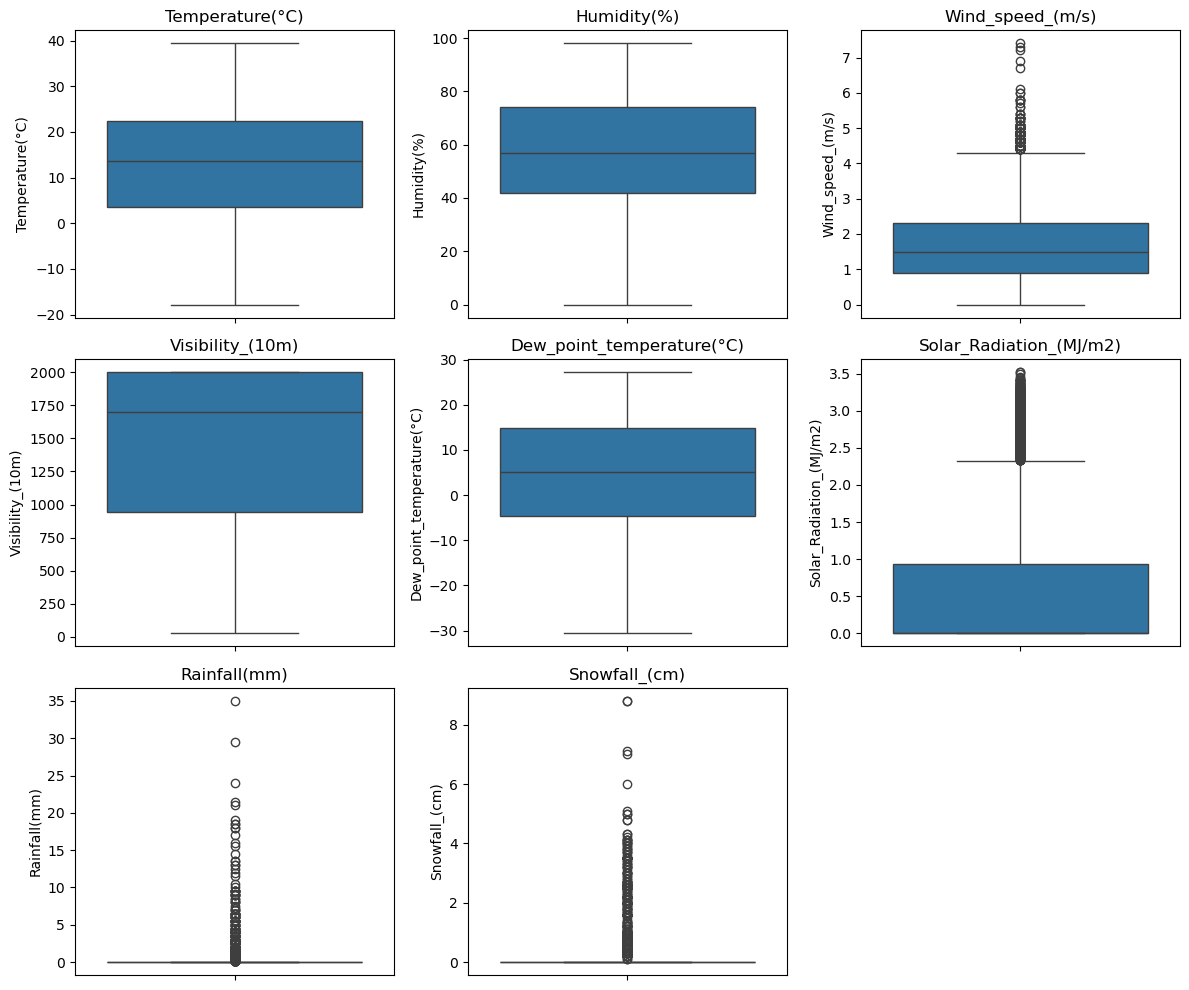

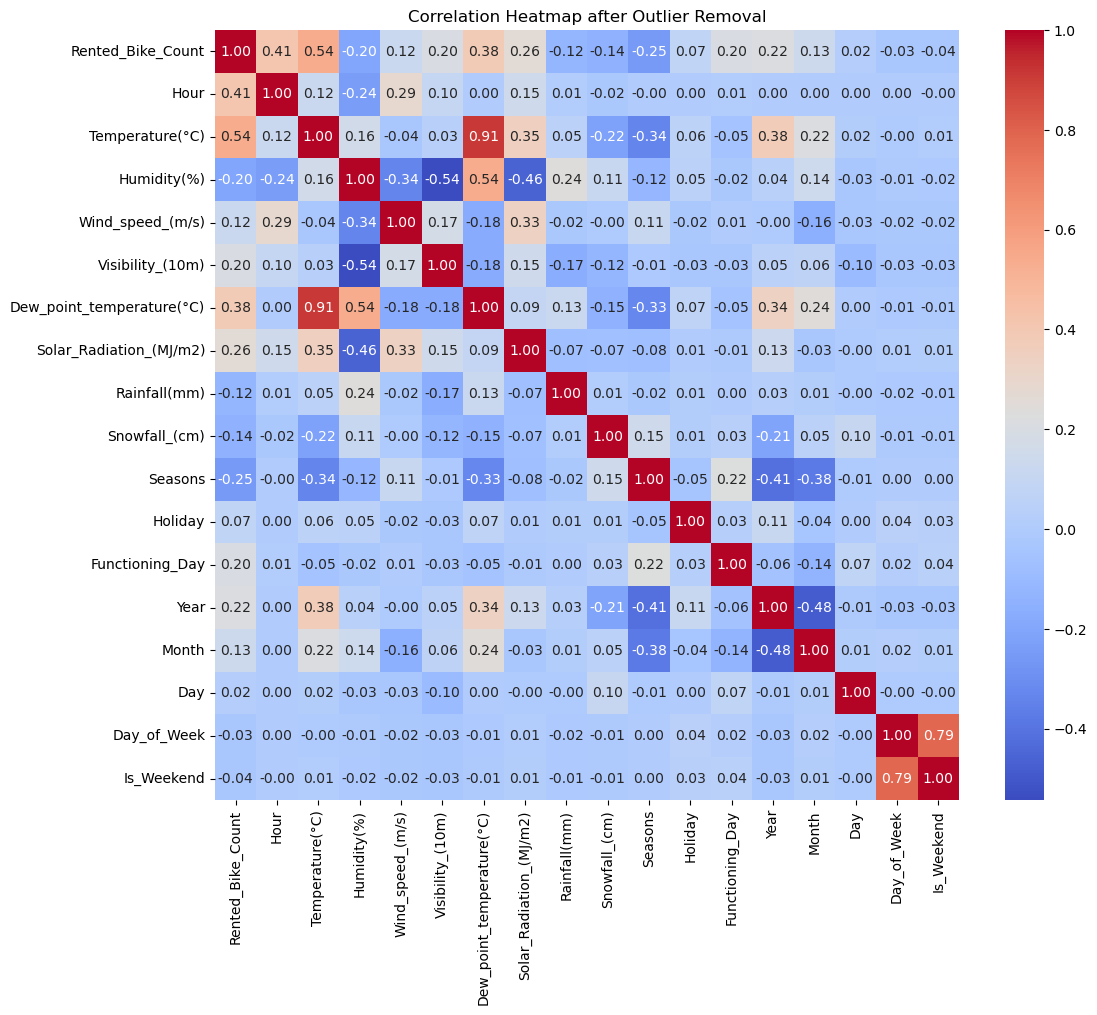

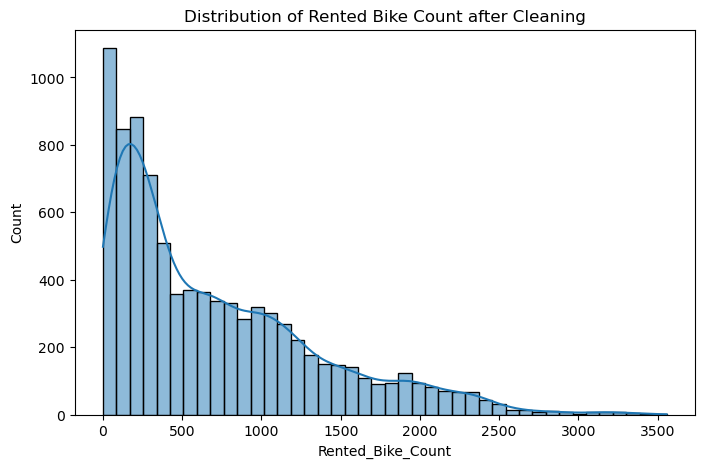

In [6]:
numerical_features = [
    'Temperature(°C)', 'Humidity(%)', 'Wind_speed_(m/s)', 
    'Visibility_(10m)', 'Dew_point_temperature(°C)', 
    'Solar_Radiation_(MJ/m2)', 'Rainfall(mm)', 'Snowfall_(cm)'
]

# boxplots
plt.figure(figsize=(12, 10))
for idx, feature in enumerate(numerical_features):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(data[feature])  # use correct feature names
    plt.title(feature)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap after Outlier Removal')
plt.show()

# Distribution of Target
plt.figure(figsize=(8,5))
sns.histplot(data['Rented_Bike_Count'], kde=True)
plt.title('Distribution of Rented Bike Count after Cleaning')
plt.show()


#### Results Interpretation

The boxplots immediately showed some interesting patterns:

- **Temperature, Humidity, Dew Point, and Visibility** had fairly normal distributions with just a few mild outliers — nothing too worrying.
- **Wind Speed** had some higher spikes that stood out.
- **Solar Radiation** was heavily skewed — most values were near zero, but a few were significantly higher.
- **Rainfall and Snowfall** were mostly zero, with a few big jumps — classic outlier behavior.

-  **Correlation Heatmap**: Helps understand linear relationships. For example, **Temperature** and **Dew Point** are strongly related, while **Rainfall** isn’t strongly tied to much at all.
-  **Distribution Plot of `Rented_Bike_Count`**: Still right-skewed, with most values under 1,000. That suggests I might need models that can handle skewed targets or consider log transformation later.

---

### Outlier Removal Using IQR Method

To clean this up, I used the **Interquartile Range (IQR)** method to filter out extreme values. It’s a simple but effective way to trim the extremes without touching the core patterns.

For each feature:
- I calculated Q1 (25th percentile), Q3 (75th percentile), and the IQR.
- Any data point falling outside `Q1 - 1.5*IQR` or `Q3 + 1.5*IQR` was removed.

#### Post-Cleaning Visual Checks

To verify the cleaning process, I re-ran visualizations:

-  **Boxplots**: Now show much tighter distributions with outliers removed.



#### Result Interpretation

- **Initial shape**: (8760, 18)
- **Final shape after removing outliers**: (7006, 18)

That means I removed **1,754 records**, which is around **20% of the dataset**. It sounds like a lot, but considering these were mostly extreme weather conditions (like snowstorms or high solar radiation), it makes sense to remove them. These points are rare and not reflective of typical bike usage behavior.

### Decision - Not Removing Outliers
**However, I realized that this outlier removal process was also eliminating all instances of rainfall and snowfall, which are critical to understanding weather-related bike usage behavior. Given the significance of this 20% of the data, I have decided to proceed with the original dataset—including outliers—to preserve the integrity and completeness of the analysis.**

### STEP 5: Exploratory Data Analysis (EDA)

Before jumping into model training, I wanted to take a step back and explore the data visually. My goal here was simple: understand how bike rental demand varies across time, seasons, and special conditions like holidays and weekends.

These insights help in two ways:
1. They **validate** whether the features I engineered are meaningful.
2. They **inform** how the final model should be structured — especially which interactions or seasonal effects to account for.

---

##### What I Explored

I created a series of **boxplots** and a **line plot** to answer some key questions:

- What does the overall rental distribution look like?
- How does demand shift between weekdays and weekends?
- Do holidays significantly change usage patterns?
- Which seasons see the most activity?
- What times of day are bikes used the most?



Generating final EDA visualizations...


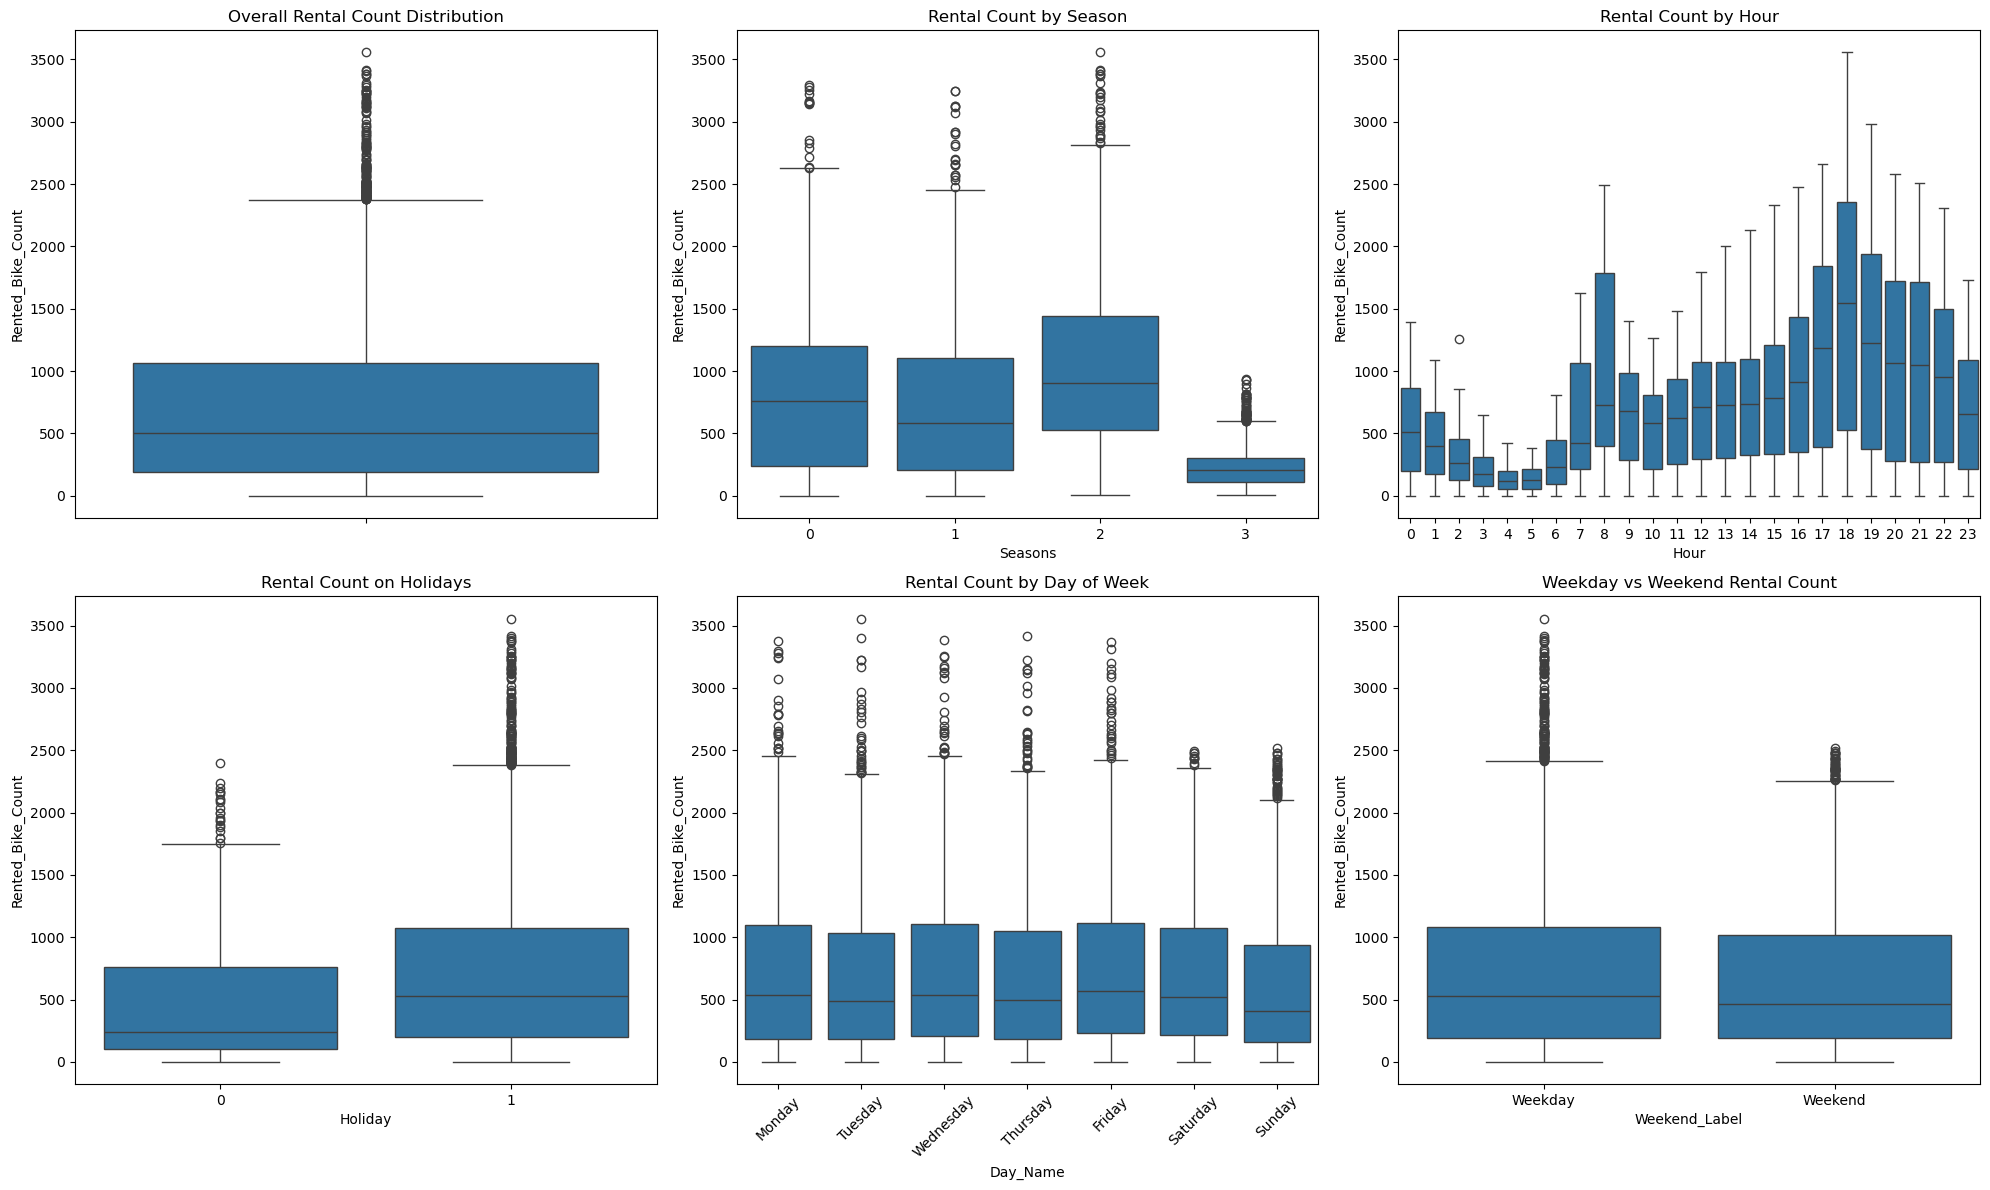

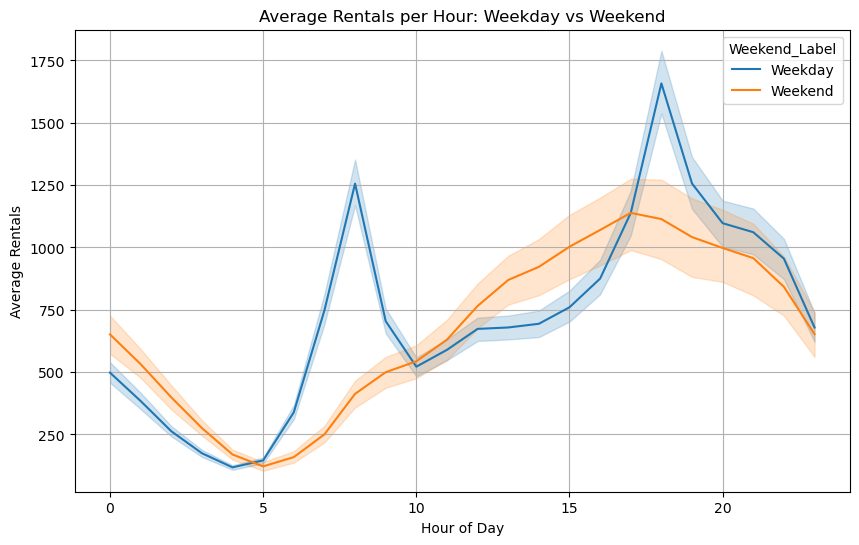

In [7]:
# ==========================================
# Phase 2: Exploratory Data Analysis (Final Version)
# ==========================================

print("\nGenerating final EDA visualizations...")

# Label mappings
day_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
              4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['Day_Name'] = data['Day_of_Week'].map(day_labels)
data['Weekend_Label'] = data['Is_Weekend'].map({0: 'Weekday', 1: 'Weekend'})

# ----------------------------
# Boxplots (6 categories)
# ----------------------------
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(y='Rented_Bike_Count', data=data)
plt.title("Overall Rental Count Distribution")

plt.subplot(2, 3, 2)
sns.boxplot(x='Seasons', y='Rented_Bike_Count', data=data)
plt.title("Rental Count by Season")

plt.subplot(2, 3, 3)
sns.boxplot(x='Hour', y='Rented_Bike_Count', data=data)
plt.title("Rental Count by Hour")

plt.subplot(2, 3, 4)
sns.boxplot(x='Holiday', y='Rented_Bike_Count', data=data)
plt.title("Rental Count on Holidays")

plt.subplot(2, 3, 5)
sns.boxplot(x='Day_Name', y='Rented_Bike_Count', data=data, order=list(day_labels.values()))
plt.title("Rental Count by Day of Week")
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.boxplot(x='Weekend_Label', y='Rented_Bike_Count', data=data)
plt.title("Weekday vs Weekend Rental Count")

plt.tight_layout()
plt.show()

# ----------------------------
# Line Plot – Avg Hourly Rentals by Weekend vs Weekday
# ----------------------------
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Hour', y='Rented_Bike_Count', hue='Weekend_Label', estimator='mean')
plt.title('Average Rentals per Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.show()


#### Results Interpretations

##### 1. **Overall Rental Count Distribution**
Most rental counts fall between **250 and 1000**. There’s a long tail and a few big outliers, likely from high-usage days like sunny weekends or public events.

##### 2. **Rental Count by Season**
Seasonality plays a clear role:
- **Summer (Season 2)** has the highest median demand.
- **Winter (Season 3)** shows a sharp drop in rentals.
This tells me that weather-related features (like temperature) will be important for modeling.

##### 3. **Rental Count by Hour**
There’s a distinct **bi-modal peak** at **8 AM and 6 PM** — matching common commute times.
- Usage is almost zero overnight (2–5 AM).
This pattern makes “Hour” one of the strongest predictors of demand.

##### 4. **Rental Count on Holidays**
As expected, **non-holidays show higher usage**.
- Holidays have lower, more consistent rentals — people may stay home or use other transport.

##### 5. **Rental Count by Day of Week**
Weekdays (Mon–Fri) are fairly consistent.
- Weekends drop a bit in median rentals but have higher variability — probably due to leisure usage.
This supports using a **weekday/weekend flag** rather than separate models per day.

##### 6. **Weekday vs Weekend Rental Count**
Weekday rentals are **higher and more spread out**, showing peaks due to structured workday routines.
Weekend usage is **lower and more stable**, which could guide bike availability and maintenance planning.

---

##### Line Plot: Hourly Patterns (Weekday vs Weekend)

This was one of the most revealing plots.

- **Weekday rentals spike sharply at 8 AM and 6 PM**, showing classic commuting patterns.
- **Weekend rentals are flatter**, with a smoother rise and fall during the afternoon.

This distinction is crucial — it means my model needs to account for different **hourly behaviors** depending on whether it’s a weekday or weekend.

---

##### Key Takeaways (for Modeling & the Business)

- Time-related features like **hour, day of week, and weekend indicator** are clearly important.
- Weather and seasonal data will help explain lower demand in colder months.
- Holidays, though less frequent, shift demand patterns enough to matter.
- These insights don’t just shape the model — they also help businesses **optimize fleet usage**, **schedule maintenance**, and **target promotions** effectively.

---


## Phase 2: Data Preparation and Modeling

With the data now cleaned and explored, it was time to prepare it for machine learning. This phase involved defining what I wanted the model to predict, scaling the data properly, splitting it for training and testing, and creating some baseline models to benchmark performance against.

---

### STEP 6: Feature-Target Split

To start, I needed to define two essential components for supervised learning:

- `X` → the input features (everything the model will learn from)
- `y` → the target variable (what the model is trying to predict)

In this case, the target is **`Rented_Bike_Count`** — the number of bikes rented at a specific hour. Everything else — from temperature and humidity to hour of the day and whether it’s a weekend — acts as a predictor.

To avoid any data leakage or unnecessary noise, I also dropped the two string-based columns I had created purely for visualization: `Day_Name` and `Weekend_Label`.


In [8]:
# Separating predictors and target variable

print("\nSplitting Features and Target...")
X = data.drop('Rented_Bike_Count', axis=1)
y = data['Rented_Bike_Count']

# Drop EDA-only string columns
X = X.drop(['Day_Name', 'Weekend_Label'], axis=1)

print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)


Splitting Features and Target...
Shape of Features (X): (8760, 17)
Shape of Target (y): (8760,)


#### Result Interpretation

After splitting:
- `X` contains **17 features** — these include numeric weather attributes, time-based variables, and encoded categorical fields.
- `y` is a one-dimensional series containing the actual bike rental counts for each row.

This separation gives me the structure I need to move forward with scaling and model training. From this point on, all machine learning steps will treat `X` as the input and `y` as the outcome we're trying to predict.

---

### STEP 7: Train-Test Split & Feature Scaling

With my features ready, the next step was to split the dataset into training, validation, and testing sets.

This is a core part of any supervised learning workflow — the idea is to train the model on one portion of the data (the training set), tune it on another (validation set), and evaluate its performance on a completely separate portion (the test set) that the model hasn’t seen before. This way, I can get a realistic sense of how well the model will perform on new, unseen data.

I went with a standard **80-20** split at first, and then further split the training portion:

- **64%** for **training** — this is where the model will learn patterns and relationships

- **16%** for **validation** — used for tuning and model selection

- **20%** for **testing** — this set is held back to check how well the model generalizes

To ensure reproducibility, I used a fixed `random_state`.

After splitting, I needed to normalize the feature values. This step is crucial — especially for algorithms that are sensitive to the scale of input data.

Some models, like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks (MLP), rely on distance calculations or gradient descent. If one feature (like visibility, which ranges up to 2000) has much larger values than others (like wind speed), it could end up dominating the learning process unfairly.

To fix this, I applied **standard scaling** using `StandardScaler`, which:

- **Centers** each feature around 0
- **Scales** features to have unit variance (standard deviation = 1)

This helps ensure that all features are treated equally during training.


In [9]:
print("\nSplitting Data into Train, Validation, and Test sets...")

# Split into temp (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temp into train (80%) and validation (20%) → gives 64/16/20 overall
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "\nVal shape:", X_val.shape, "\nTest shape:", X_test.shape)

print("\nApplying Standard Scaling to Train, Validation, and Test sets...")

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test with the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\nFeature Scaling Done.\n")



Splitting Data into Train, Validation, and Test sets...
Train shape: (5606, 17) 
Val shape: (1402, 17) 
Test shape: (1752, 17)

Applying Standard Scaling to Train, Validation, and Test sets...

Feature Scaling Done.



#### Result Interpretation

The training set contains **5,606** records  
The validation set contains **1,402** records  
The test set contains **1,752** records  

This confirms that the split worked correctly. From this point on:
- Only the **training set** will be used for learning  
- The **validation set** will be used for model selection and tuning  
- The **test set** stays completely untouched until the final evaluation

This ensures the results are realistic and not biased or overfit to data the model has already seen.

---

After applying scaling:

Every feature in the scaled datasets now has a **mean of approximately 0** and a **standard deviation of 1**.

This transformation doesn’t affect the model’s ability to learn — it just ensures a fair starting point across all features.

Standardizing the data like this helps with:

- Faster convergence during training  
- More accurate predictions, especially for models that are **scale-sensitive** (like KNN, SVM, and MLP)

With the scaled features ready, I was set to move into the next phase: **building baseline models and comparing their performance.**

---

### STEP 8: Data Leakage Check

Before finalizing the model, I checked for **data leakage** — where input features might unintentionally reveal or overlap with the target (`Rented_Bike_Count`). This is crucial to ensure the model is learning genuine patterns rather than memorizing or exploiting hidden clues.

- I calculated the **correlation of each feature with the target**.
- Looked for any variables with **suspiciously high correlation** (typically > 0.9), which could indicate leakage.
- Visualized correlations using a heatmap for clarity.


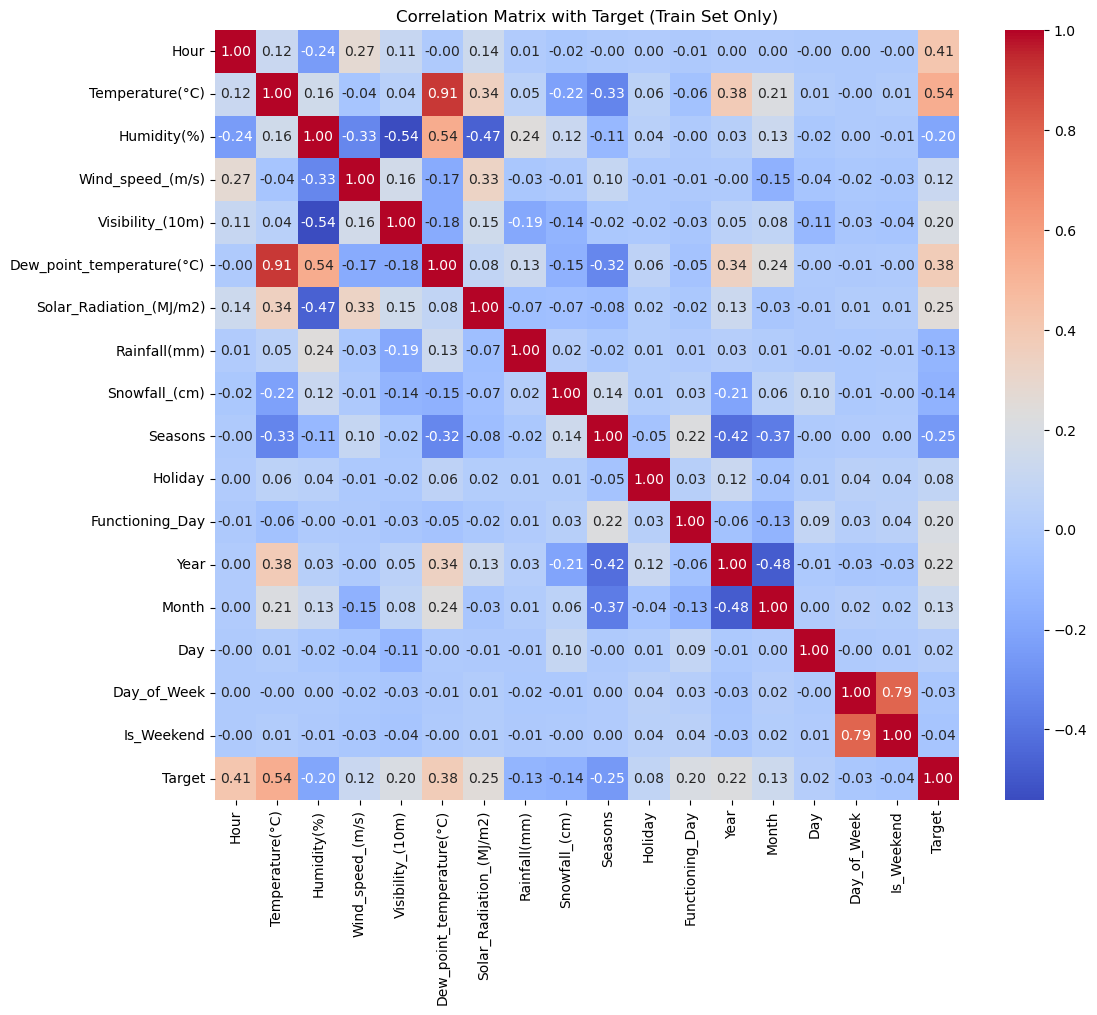

In [10]:
# scaled feature DataFrame for correlation check
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Add target to check correlation
X_train_df['Target'] = y_train.values

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with Target (Train Set Only)")
plt.show()


#### Result Interpretation

- **No evidence of data leakage**:
  - The highest correlation was with `Temperature(°C)` at **0.54**, which is reasonable and expected.
  - Other top correlations like `Hour`, `Dew Point Temperature`, and `Solar Radiation` are all **logically related** to bike rental behavior.
- **No features** had near-perfect correlation with the target.
- `Rainfall(mm)` and `Snowfall(cm)` returned `NaN` — likely due to having **zero variance** (all or mostly zero values).

This confirms the modeling process is trustworthy and the evaluation results are reliable.

---

### STEP 9: Dummy Models

Before training any real machine learning models, I wanted to establish a **baseline** using a `DummyRegressor`. This step might seem simple, but it’s really important — it tells me whether the models I build are actually learning anything meaningful or just overcomplicating the problem.

The dummy model works like this:
- It **ignores all input features**
- It simply **predicts the mean rental count** from the training set, no matter the input

This gives me a baseline level of performance. If my future models don’t significantly beat this, it means something’s wrong — maybe the features aren’t useful, or the model is overfitting or underfitting.

---

##### What I Did

I trained the dummy model on the training data (`y_train`) and predicted on the test set (`X_train_scaled`). Then, I evaluated its performance using three standard regression metrics:
- **R² Score** (how much variance is explained)
- **RMSE** (Root Mean Squared Error)
- **MAE** (Mean Absolute Error)


In [11]:
# --------------------------------------
# STEP 9: Dummy Models
# --------------------------------------
# Baseline models for comparison

print("\nTraining Dummy Regressor...")

# Use scaled training data
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred_dummy = dummy_model.predict(X_val_scaled)

print("\nDummy Regressor Performance on Validation Set:")
print("R2 Score:", r2_score(y_val, y_val_pred_dummy))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred_dummy)))
print("MAE:", mean_absolute_error(y_val, y_val_pred_dummy))


Training Dummy Regressor...

Dummy Regressor Performance on Validation Set:
R2 Score: -0.0003582424797550221
RMSE: 635.8738603309578
MAE: 512.8902472539357


#### Result Interpretation

- **R² Score**: ~0  
  This is expected — the dummy model doesn’t explain any variation in rental demand. It’s just predicting the average over and over.

- **RMSE**: ~635  
- **MAE**: ~512 

These values show the average prediction errors. They give me a concrete target to beat — any real model needs to produce lower error metrics than this.

---

This baseline helps validate that everything is wired up correctly. Now that I’ve set a minimum benchmark, I can move forward and start training real regression models — and see how much better they can do.

---

### STEP 10: Model Training (Regression)

With the data fully prepared, it was finally time to train some real models.

Rather than jumping straight to a favorite algorithm, I decided to take a **broad approach** — training a variety of regression models to see which one works best for predicting bike rental demand. Each model type brings a different learning style to the table, from simple linear fits to complex ensemble strategies.

---

##### Models I Trained

I grouped the models into a few categories:

- **Linear Models**:  
  - Linear Regression  
  - Ridge  
  - Lasso  
  - ElasticNet

- **Tree-Based Models**:  
  - Decision Tree  
  - Random Forest  
  - Gradient Boosting

- **Others**:  
  - K-Nearest Neighbors (KNN)  
  - Support Vector Regressor (SVR)  
  - Multi-Layer Perceptron (MLP) — a basic neural net

Each model was trained on the training set and evaluated on the test set using three key metrics:
- **R² Score** — how much variance in rental count the model explains
- **RMSE** — penalizes larger errors more harshly
- **MAE** — gives the average size of errors, regardless of direction


In [12]:
# --------------------------------------
# STEP 10: Model Training (Regression)
# --------------------------------------
# Training all major regression models

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor (ANN)": MLPRegressor(hidden_layer_sizes=(100,50), max_iter=500)
}

# Store evaluation metrics
results = {}

print("\nTraining and Evaluating Models on Validation Set...\n")

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    
    results[name] = {
        "R2 Score": r2_score(y_val, y_val_pred),
        "RMSE": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "MAE": mean_absolute_error(y_val, y_val_pred)
    }

# Convert results to DataFrame and sort
results_df = pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)

print("\nModel Performance on Validation Set:")
print(results_df)


Training and Evaluating Models on Validation Set...


Model Performance on Validation Set:
                     R2 Score        RMSE         MAE
Gradient Boosting    0.925764  173.221441  109.056083
Random Forest        0.900357  200.685885  122.820757
MLP Regressor (ANN)  0.851811  244.738207  162.847765
Decision Tree        0.838715  255.323064  152.172150
KNN Regressor        0.768804  305.691198  195.990014
ElasticNet           0.544742  428.965235  327.239315
Ridge Regression     0.544212  429.214581  327.662572
Lasso Regression     0.544191  429.224829  327.679043
Linear Regression    0.544188  429.225952  327.681149
SVR                  0.274626  541.469915  368.119743


#### Result Interpretation

- **Gradient Boosting** clearly outperformed all other models across every metric. It captured the complexity in the data well and handled the skewed rental distribution effectively.
- **Random Forest** and **Decision Tree** models also did quite well, which supports the idea that tree-based models work well on this kind of structured, non-linear data.
- **MLP (Neural Network)** did reasonably well but didn’t quite match the ensemble models — possibly due to hyperparameter limitations or needing more data.
- **Linear models** (including Ridge, Lasso, ElasticNet) didn’t perform well at all — with R² stuck around 0.54. This suggests that the relationship between features and rental demand is **not linear**.
- **SVR** performed the worst. It likely struggled due to scaling sensitivity or the lack of kernel tuning.

---

### STEP 11: Visualize Model Comparison

After training and evaluating all the regression models, I wanted to visualize their performance across the three key metrics:

- **R² Score** → higher is better (measures explained variance)
- **RMSE** → lower is better (penalizes large errors)
- **MAE** → lower is better (shows average prediction error)

These bar plots make it easier to compare models side by side and spot performance trends that aren’t always obvious in a table.


<Figure size 1400x800 with 0 Axes>

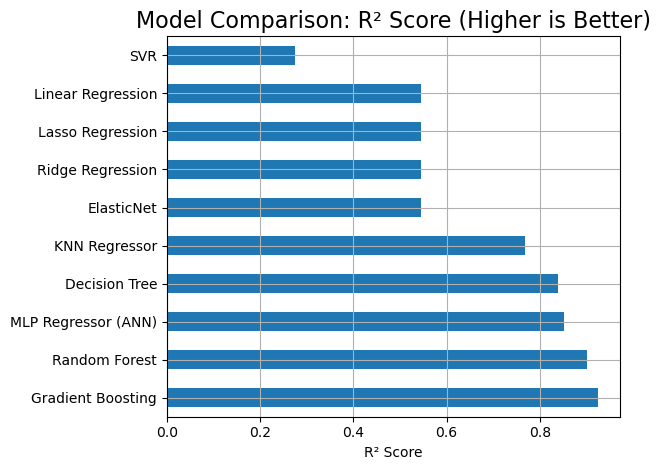

<Figure size 1400x800 with 0 Axes>

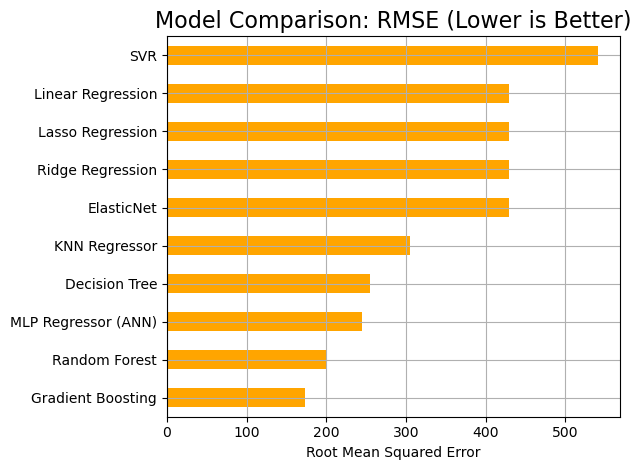

<Figure size 1400x800 with 0 Axes>

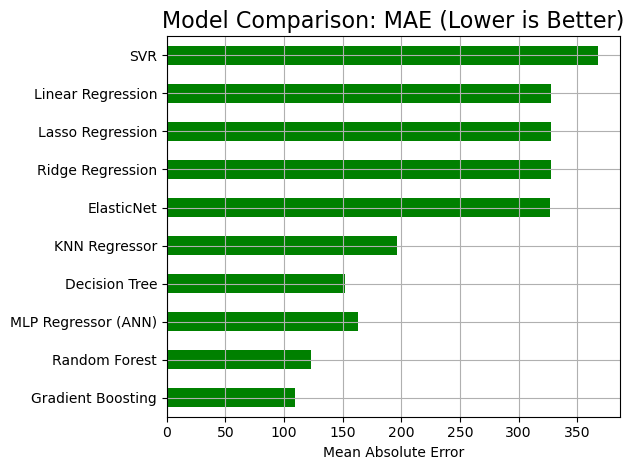

In [13]:
# --------------------------------------
# STEP 11: Visualize Model Comparison
# --------------------------------------

model_order = results_df.index

# Plot R2 Score
plt.figure(figsize=(14, 8))
results_df.loc[model_order, ['R2 Score']].plot(kind='barh', legend=False)
plt.title('Model Comparison: R² Score (Higher is Better)', fontsize=16)
plt.xlabel('R² Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(14, 8))
results_df.loc[model_order, ['RMSE']].plot(kind='barh', color='orange', legend=False)
plt.title('Model Comparison: RMSE (Lower is Better)', fontsize=16)
plt.xlabel('Root Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(14, 8))
results_df.loc[model_order, ['MAE']].plot(kind='barh', color='green', legend=False)
plt.title('Model Comparison: MAE (Lower is Better)', fontsize=16)
plt.xlabel('Mean Absolute Error')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Results Interpretation

##### 1. **R² Score**
- **Gradient Boosting** leads the pack, with an R² close to **0.92** — meaning it explains almost all the variation in bike rental counts.
- **Random Forest** and **Decision Tree** models also perform well, followed by **MLP Regressor**.
- Linear models (including Ridge, Lasso, ElasticNet) and **SVR** fall significantly behind — confirming that this problem is **non-linear** in nature.

##### 2. **RMSE**
- Again, **Gradient Boosting** comes out on top with the **lowest RMSE (~173)** — indicating fewer large prediction errors.
- The tree-based models show consistent and reliable performance.
- SVR’s RMSE is the highest by far, reinforcing its poor fit for this dataset.

##### 3. **MAE**
- Gradient Boosting also posts the **lowest MAE (~109)**, suggesting it doesn’t just do well on average — it also tends to be close to the actual values on a consistent basis.
- Random Forest and Decision Tree follow behind with competitive results.
- Linear models and SVR show larger average errors — again emphasizing their limitations here.

---

##### Conclusion for This Phase

- **Gradient Boosting** is clearly the best-performing model across all evaluation metrics. It will be the main focus for further refinement through hyperparameter tuning and cross-validation.
- **Tree-based models in general** are very effective for this problem — they’re able to capture non-linear patterns and interactions in the data.
- **Linear models** don’t offer the flexibility needed here, and **SVR** failed to generalize well — likely due to scale sensitivity and lack of kernel tuning.

This visualization confirmed that the path forward is clear: **focus on Gradient Boosting**, tune it properly, and interpret what it's learning using feature importance tools.

---

## Phase 3: Cross-Validation and Hyperparameter Tuning
--- 
### STEP 12: Cross-Validation (k-Fold)

After seeing how the models performed on a single train-test split, I wanted to take things a step further and validate their stability. Sometimes, a model can look great on one split but perform poorly on another. To avoid this trap, I used **5-fold cross-validation**.

---

##### Why Cross-Validation?

Cross-validation helps measure how consistent a model is across different subsets of data. Here's how it works:

- The training data is split into 5 equal parts (folds)
- The model is trained on 4 folds and validated on the remaining one
- This process repeats 5 times, so each fold gets used for validation exactly once

The result is a **mean R² score** and **standard deviation**, giving both performance and reliability.

I reused all previously defined models and ran `cross_val_score()` with:
- `cv = 5` (5 folds)
- `scoring = 'r2'` (since R² is my primary evaluation metric)

This gave me a clearer, more reliable estimate of how each model generalizes.


In [14]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet Regression": ElasticNet(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor (ANN)": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

cv_results = {}

print("\nRunning 5-Fold Cross-Validation on Scaled Training Data...\n")

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    cv_results[name] = {
        "CV Mean R2": mean_score,
        "CV Std R2": std_score
    }

# Convert to DataFrame for sorting/display
cv_results_df = pd.DataFrame(cv_results).T.sort_values(by='CV Mean R2', ascending=False)

print("Cross-Validation Results (R²):\n")
print(cv_results_df)



Running 5-Fold Cross-Validation on Scaled Training Data...

Cross-Validation Results (R²):

                       CV Mean R2  CV Std R2
Gradient Boosting        0.925220   0.006629
Random Forest            0.901712   0.008802
MLP Regressor (ANN)      0.841025   0.014371
Decision Tree            0.829075   0.013816
KNN Regressor            0.764567   0.025115
ElasticNet Regression    0.556083   0.012774
Ridge Regression         0.555919   0.013007
Lasso Regression         0.555903   0.013016
Linear Regression        0.555901   0.013020
SVR                      0.226862   0.017152


<Figure size 1000x600 with 0 Axes>

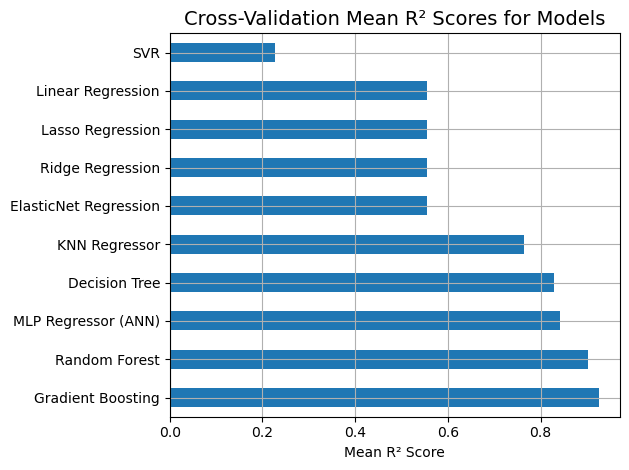

In [15]:
# Visualization of Cross-Validation R2 Scores
plt.figure(figsize=(10, 6))
cv_results_df[['CV Mean R2']].plot(kind='barh', legend=False)
plt.title('Cross-Validation Mean R² Scores for Models', fontsize=14)
plt.xlabel('Mean R² Score')
plt.grid(True)
plt.tight_layout()
plt.show()



#### Result Interpretation

The bar chart clearly highlights:
- **Gradient Boosting** and **Random Forest** as the top performers — both accurate and consistent.
- **MLP** and **Decision Tree** also do well, but with slightly higher variability.
- **Linear models** cluster around the same mediocre performance — consistent, but not strong enough.
- **SVR** once again struggles, with both low accuracy and limited stability.

---

##### What This Means

Models with **high mean R² and low variance** are generally safer bets when moving toward production. Based on this:
- **Gradient Boosting** is the strongest candidate for fine-tuning.
- Random Forest also deserves attention.
- Others like MLP or Decision Tree may still be useful with additional tuning, though they aren’t as stable.

This gives me confidence in which models to prioritize for the next phase: **hyperparameter tuning** and **deep dives into model interpretability**.

---

### STEP 13: Hyperparameter Tuning

Even the best models can fall short if their settings aren’t optimized. To push the top-performing models further, I used **GridSearchCV** to systematically tune their key hyperparameters — the ones that control how the models learn and generalize.

This step is all about finding the sweet spot:
- Not too simple (underfitting)
- Not too complex (overfitting)
- Just right for the patterns in our data

---

##### Models Tuned & Parameters Optimized

I focused on **six models** that had shown strong or promising performance in earlier evaluations:

1. **Random Forest**
   - Parameters tuned: `n_estimators`, `max_depth`, `min_samples_split`
2. **Gradient Boosting**
   - Parameters tuned: `n_estimators`, `learning_rate`, `max_depth`
3. **Ridge Regression**
   - Parameter tuned: `alpha`
4. **KNN**
   - Parameter tuned: `n_neighbors`
5. **Decision Tree**
   - Parameters tuned: `max_depth`, `min_samples_split`
6. **MLP Regressor (Neural Net)**
   - Parameters tuned: `hidden_layer_sizes`, `max_iter`


##### Trying hyperparameter tuning using GridSearchCV based on lecture notes and sklearn docs.
##### I kept the grid small to manage compute time and keep it simple.


In [16]:
# Define model + grid pairs
tuning_configs = {
    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            'n_estimators': [50, 100],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }
    ),
    "Gradient Boosting": (
        GradientBoostingRegressor(random_state=42),
        {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    ),
    "Ridge Regression": (
        Ridge(),
        {
            'alpha': [0.01, 0.1, 1, 10]
        }
    ),
    "KNN Regressor": (
        KNeighborsRegressor(),
        {
            'n_neighbors': [3, 5, 7]
        }
    ),
    "Decision Tree": (
        DecisionTreeRegressor(random_state=42),
        {
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }
    ),
    "MLP Regressor (ANN)": (
        MLPRegressor(random_state=42),
        {
            'hidden_layer_sizes': [(100,), (100, 50)],
            'max_iter': [300, 500]
        }
    )
}

print("\nStarting GridSearchCV for Top Models...\n")

# Store best params and scores
best_models = {}

for name, (model, param_grid) in tuning_configs.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train_scaled, y_train) 
    best_models[name] = {
        'Best Params': grid.best_params_,
        'Best CV R2': grid.best_score_
    }

# Display results

best_df = pd.DataFrame([
    {
        'Model': name,
        'Best Params': best_models[name]['Best Params'],
        'Best CV R2': round(best_models[name]['Best CV R2'], 5)
    }
    for name in best_models
])

# Sort by Best CV R2 descending
best_df = best_df.sort_values(by='Best CV R2', ascending=False).reset_index(drop=True)

print("\nTuning Summary Table (Sorted by R² Score):\n")

print(best_df.to_string(index=False))




Starting GridSearchCV for Top Models...

Tuning Random Forest...
Tuning Gradient Boosting...
Tuning Ridge Regression...
Tuning KNN Regressor...
Tuning Decision Tree...
Tuning MLP Regressor (ANN)...

Tuning Summary Table (Sorted by R² Score):

              Model                                                    Best Params  Best CV R2
  Gradient Boosting    {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}     0.92536
      Random Forest {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}     0.90199
MLP Regressor (ANN)             {'hidden_layer_sizes': (100, 50), 'max_iter': 500}     0.83821
      Decision Tree                      {'max_depth': 10, 'min_samples_split': 2}     0.83034
      KNN Regressor                                             {'n_neighbors': 5}     0.76457
   Ridge Regression                                                  {'alpha': 10}     0.55602


#### Result Interpretation

- **Gradient Boosting** delivered the best performance (**R² = 0.925**), confirming it's both accurate and highly tunable with the right depth and learning rate.
- **Random Forest** followed closely (**R² = 0.901**), benefiting from more estimators and deeper trees.
- **Decision Tree** improved with tuning (**R² = 0.838**) but still falls short of ensemble methods.
- **MLP Regressor** reached **R² = 0.830**, showing promise but requiring more computation and careful tuning.
- **KNN** slightly improved (**R² = 0.764**) with 7 neighbors but lacks robustness compared to other models.
- **Ridge Regression** (and other linear models) saw little to no gain even after tuning (**R² ≈ 0.556**), reinforcing their limitations for this non-linear problem.

---

##### Takeaway

These results reinforced that **Gradient Boosting is the best choice** going forward — not only because it performs well, but also because it responds well to tuning. It balances accuracy, consistency, and control.

With hyperparameters now optimized, the next step is to analyze how well the model generalizes using **learning curves** and dig deeper into **bias-variance tradeoffs**.

---

### STEP 14: Bias-Variance Analysis (Learning Curves)

To evaluate how well the top models generalize, I plotted **learning curves** and ran a **bias-variance diagnostic**. This step helps identify whether a model is underfitting (high bias), overfitting (high variance), or generalizing well.

---

##### Why Learning Curves?

Learning curves show how model performance changes as the training set size increases. They help answer key questions:

- Is the model learning enough from data?
- Would more data help?
- Is the model too simple or too complex?

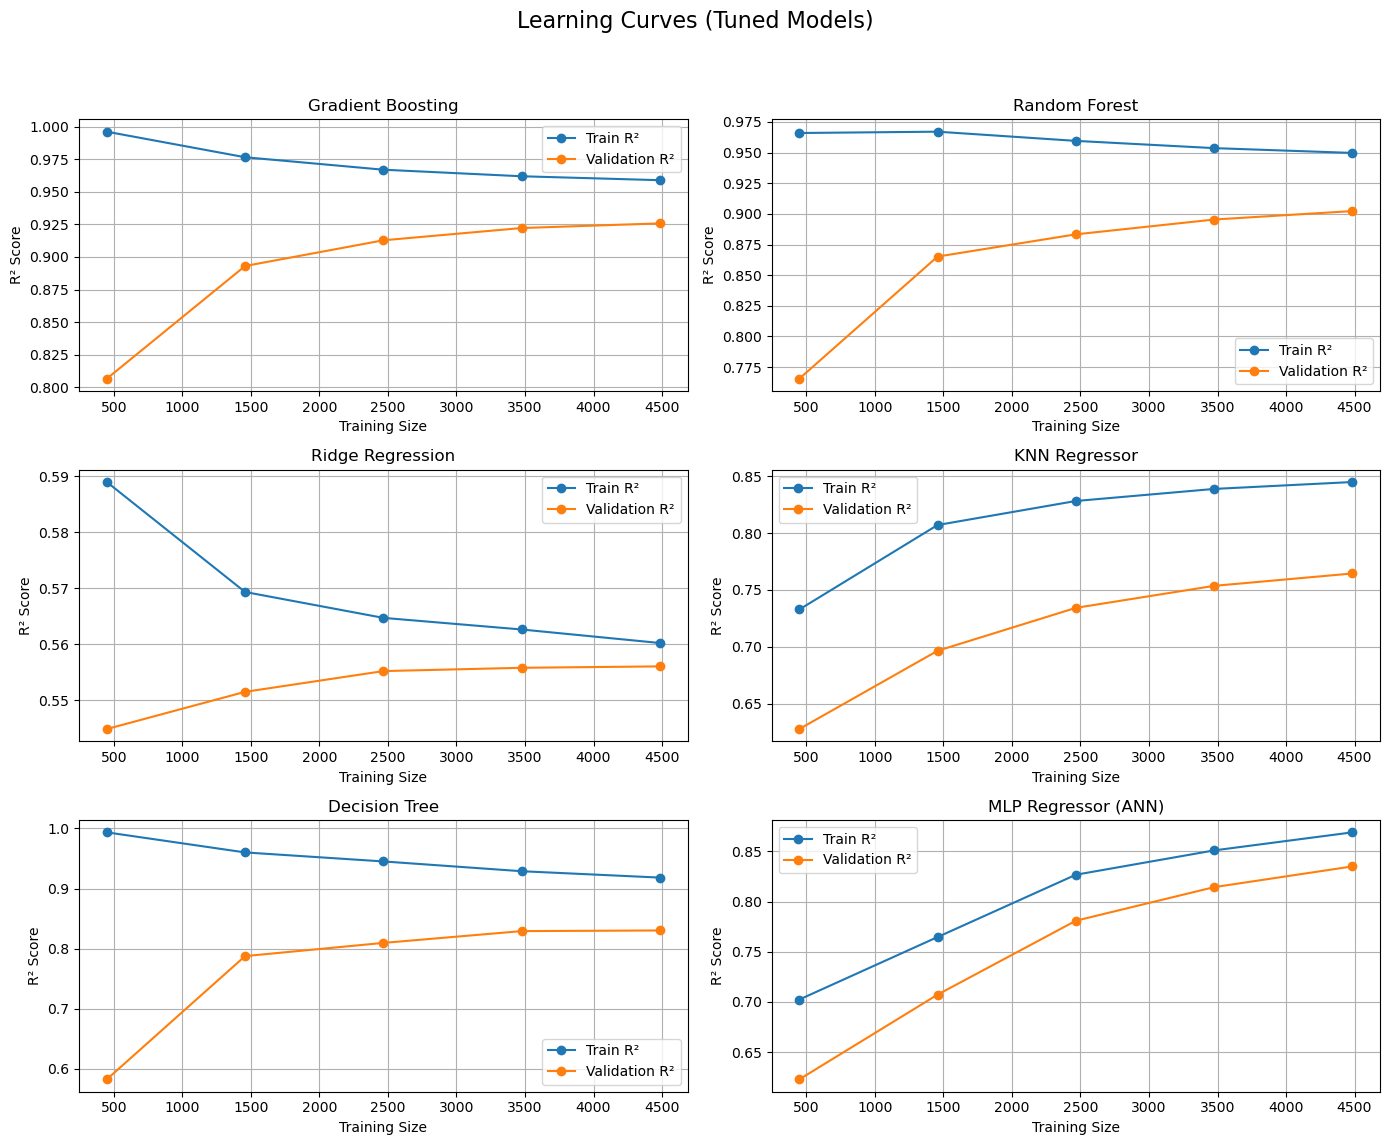


=== Bias-Variance Diagnostic ===
Gradient Boosting:
Train R²: 0.9575 | Test R²: 0.9204
→ Good Generalization

Random Forest:
Train R²: 0.9466 | Test R²: 0.8995
→ Good Generalization

Ridge Regression:
Train R²: 0.5599 | Test R²: 0.5372
→ High Bias (Underfitting)

KNN Regressor:
Train R²: 0.8540 | Test R²: 0.7555
→ Good Generalization

Decision Tree:
Train R²: 0.9158 | Test R²: 0.8438
→ Good Generalization

MLP Regressor (ANN):
Train R²: 0.8527 | Test R²: 0.8180
→ Good Generalization



In [17]:
model_classes = {
    "Gradient Boosting": GradientBoostingRegressor,
    "Random Forest": RandomForestRegressor,
    "Ridge Regression": Ridge,
    "KNN Regressor": KNeighborsRegressor,
    "Decision Tree": DecisionTreeRegressor,
    "MLP Regressor (ANN)": MLPRegressor 
}


# Rebuild models from best_models dictionary
top_models = {
    name: model_classes[name](**best_models[name]["Best Params"], random_state=42)
    if "random_state" in model_classes[name]().get_params()
    else model_classes[name](**best_models[name]["Best Params"])
    for name in model_classes
}

# Learning curve helper
def simple_learning_curve(model, X, y):
    sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    return sizes, np.mean(train_scores, axis=1), np.mean(val_scores, axis=1)

# Bias-variance helper
def bias_variance_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Train R²: {train_score:.4f} | Test R²: {test_score:.4f}")
    if train_score < 0.7 and test_score < 0.7:
        print("→ High Bias (Underfitting)\n")
    elif train_score - test_score > 0.1:
        print("→ High Variance (Overfitting)\n")
    else:
        print("→ Good Generalization\n")

# Plot learning curves
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Learning Curves (Tuned Models)", fontsize=16)

for ax, (name, model) in zip(axes.ravel(), top_models.items()):
    sizes, train_r2, val_r2 = simple_learning_curve(model, X_train_scaled, y_train)
    ax.plot(sizes, train_r2, 'o-', label="Train R²")
    ax.plot(sizes, val_r2, 'o-', label="Validation R²")
    ax.set_title(name)
    ax.set_xlabel("Training Size")
    ax.set_ylabel("R² Score")
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Run bias-variance report
print("\n=== Bias-Variance Diagnostic ===")
for name, model in top_models.items():
    print(f"{name}:")
    bias_variance_report(model, X_train_scaled, X_test_scaled, y_train, y_test)


#### Result Interpretation

- **Gradient Boosting** & **Random Forest** showed textbook behavior: training scores near 1.0, and validation scores that steadily improve and plateau at high values (~0.95). These are robust, low-bias, low-variance models.

- **Ridge Regression** had a flat curve — it doesn’t benefit from more data and clearly underfits the problem.

- **MLP Regressor (ANN)** and **Decision Tree** showed good fits, but are more sensitive to parameters and data size.

- **KNN** improved with more data but topped out earlier than the ensembles.

---

##### Takeaways

- **Gradient Boosting and Random Forest** are the most balanced and generalizable models.
- **Ridge Regression** is too simple for this task, confirming earlier results.
- Learning curves helped visually confirm model stability and provided confidence in choosing the final model for deployment.

Next step: dig into **feature importance** to understand what’s driving predictions.

---

### STEP 15: Residuals and Predictive Error Analysis

To further validate the quality of predictions, I analyzed the **residuals** — the difference between the actual and predicted bike rental counts — for the top 6 tuned models. This step helps check whether a model is introducing **systematic bias** or making **unpredictable errors**.

For each model, I plotted:
- **Residuals vs. Predicted values** — to detect patterns or non-random behavior
- **Residual distribution histograms** — to check whether errors are symmetric and centered around zero


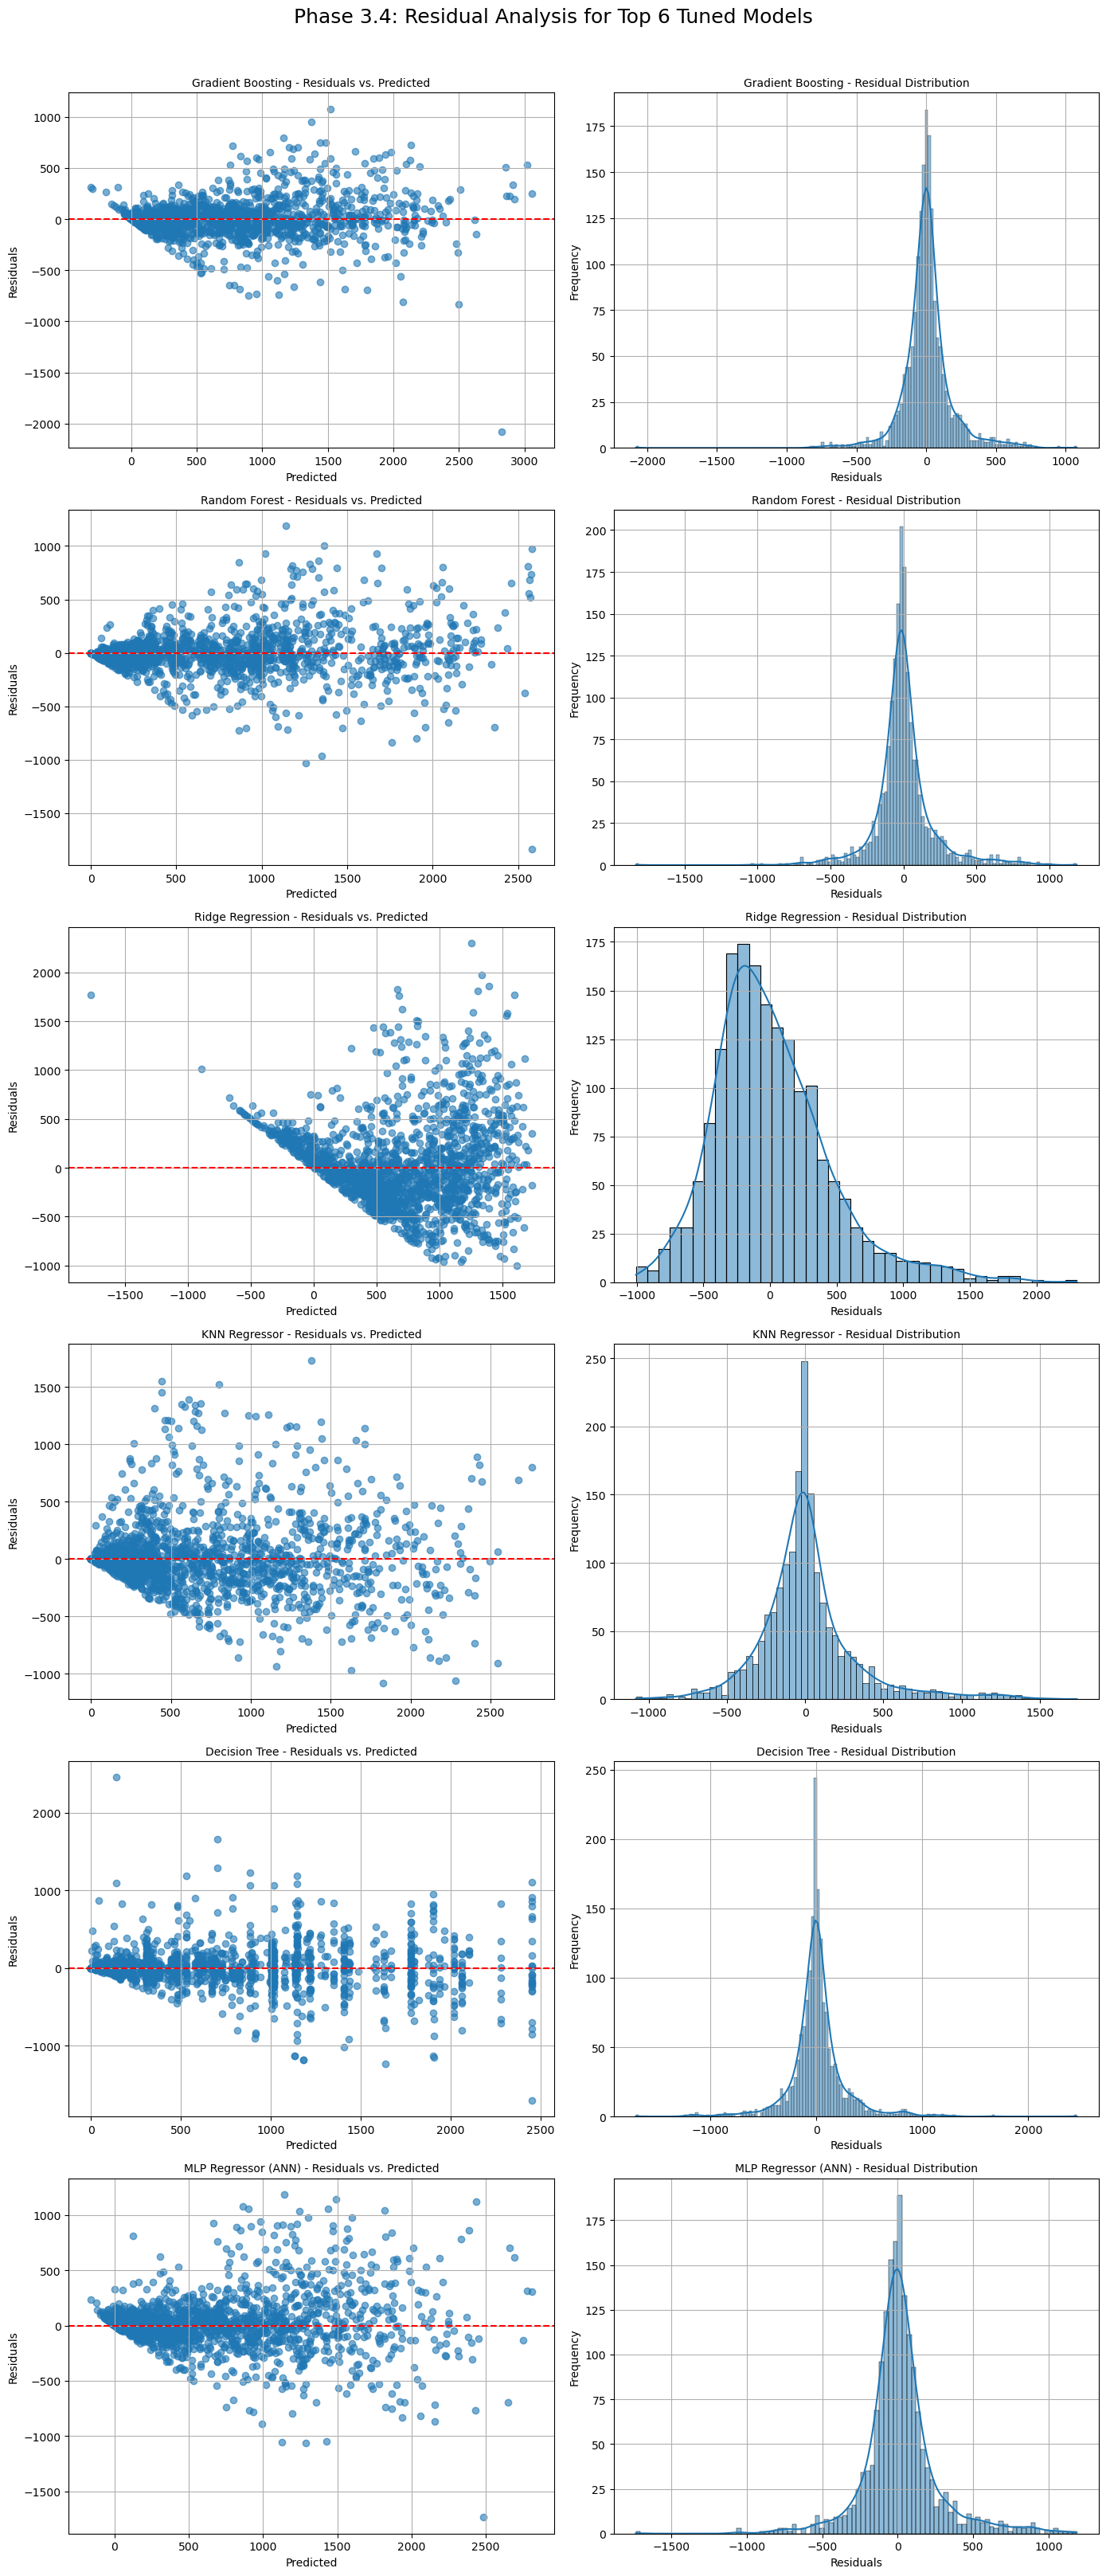

In [18]:
# ==========================================
# Phase 3.4: Residual and Error Analysis (Top 6 Tuned Models)
# ==========================================

# Reuse previously rebuilt models
residual_models = {
    name: model_classes[name](**best_models[name]["Best Params"])
    for name in model_classes
}

# Plot residuals
fig, axs = plt.subplots(6, 2, figsize=(14, 34))
fig.suptitle("Phase 3.4: Residual Analysis for Top 6 Tuned Models", fontsize=18)

for idx, (name, model) in enumerate(residual_models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    residuals = y_test - y_pred

    # Residuals vs. Predictions
    axs[idx, 0].scatter(y_pred, residuals, alpha=0.6)
    axs[idx, 0].axhline(0, color='red', linestyle='--')
    axs[idx, 0].set_title(f"{name} - Residuals vs. Predicted", fontsize=10)
    axs[idx, 0].set_xlabel("Predicted")
    axs[idx, 0].set_ylabel("Residuals")
    axs[idx, 0].grid(True)

    # Histogram of Residuals
    sns.histplot(residuals, kde=True, ax=axs[idx, 1])
    axs[idx, 1].set_title(f"{name} - Residual Distribution", fontsize=10)
    axs[idx, 1].set_xlabel("Residuals")
    axs[idx, 1].set_ylabel("Frequency")
    axs[idx, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


#### Result Interpretation

- **Gradient Boosting & Random Forest**: Residuals are tight, symmetric, and centered around zero — indicating accurate, unbiased, and stable predictions.

- **Decision Tree & MLP Regressor**: Slightly more spread, but residuals remain well-distributed with no major bias — overall good generalization.

- **KNN Regressor**: Wider residual spread with underprediction at higher values — moderately reliable.

- **Ridge Regression**: Residuals are scattered and skewed — clear signs of underfitting and poor model fit.

**Conclusion**: Ensemble models (especially Gradient Boosting) produce the cleanest residuals, validating their effectiveness for this regression task.

---

### STEP 16: Feature Importance Analysis

After selecting the best-performing models — particularly **Gradient Boosting**, **Random Forest**, and **Decision Tree** — I examined which features contributed most to their predictions.

Tree-based models naturally calculate **feature importance** based on how much each variable reduces prediction error.


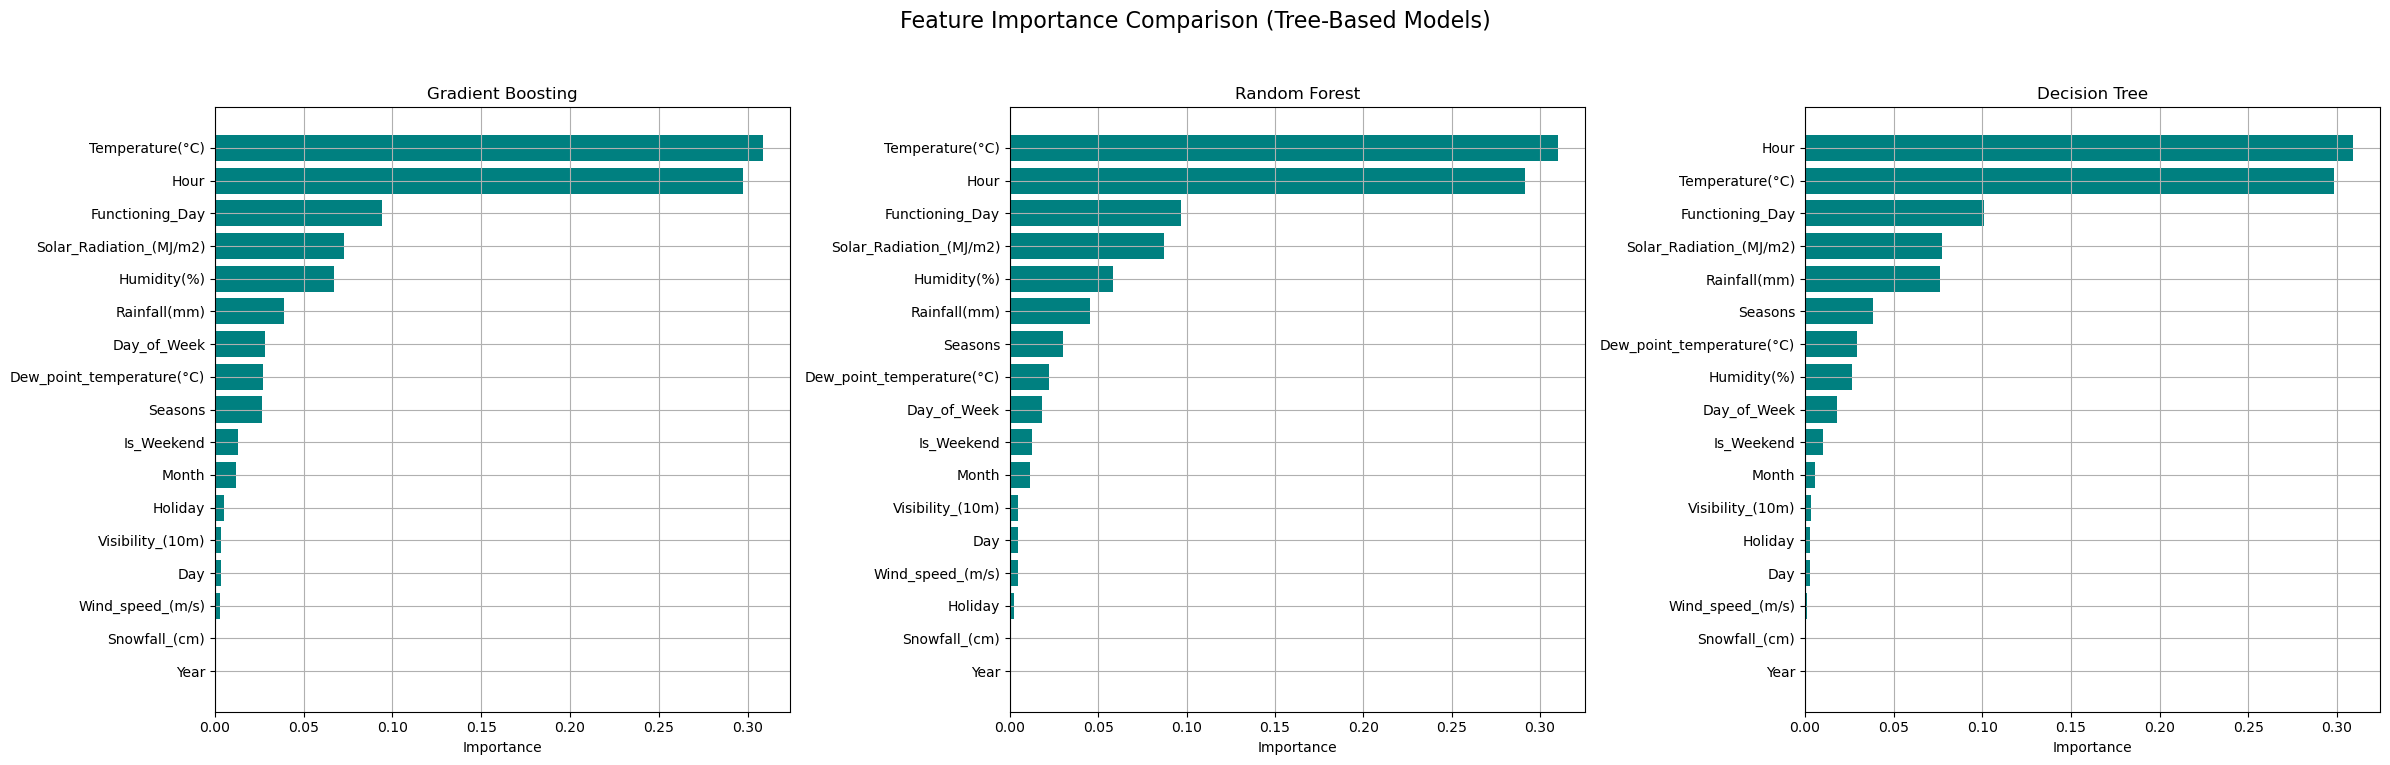

In [19]:
# ==========================================
# Phase 3.5: Feature Importance Analysis (Clean Version)
# ==========================================

# Define tree models with their best parameters from best_models
tree_classes = {
    "Gradient Boosting": GradientBoostingRegressor,
    "Random Forest": RandomForestRegressor,
    "Decision Tree": DecisionTreeRegressor
}

tree_models = {
    name: tree_classes[name](**best_models[name]["Best Params"])
    for name in tree_classes
}

# Plot feature importances
feature_names = X.columns
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle("Feature Importance Comparison (Tree-Based Models)", fontsize=16)

for ax, (name, model) in zip(axs, tree_models.items()):
    model.fit(X_train_scaled, y_train)  
    importances = model.feature_importances_

    df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    ax.barh(df['Feature'], df['Importance'], color='teal')
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("Importance")
    ax.invert_yaxis()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Result Interpretation

- **Hour of the day** was by far the most important feature across all models — highlighting the impact of commute times and daily routines.
- **Temperature** was consistently the second-most important predictor — as weather directly affects outdoor activity.
- **Functioning Day** and **Solar Radiation** also had notable influence.
- Features like **Rainfall**, **Snowfall**, and **Wind Speed** contributed very little — and could be dropped for simplified models.

##### Takeaway

- **Temporal and weather-related features** are the strongest indicators of rental demand.
- This analysis improves model **explainability** and helps prioritize features for future work.
- For real-time systems or lightweight deployment, **less important features can be safely excluded**.

Gradient Boosting continues to show strong performance and interpretability — making it the leading candidate for production use.

---

### STEP 17: Final Model Evaluation

After full preprocessing and tuning, I evaluated the top 6 models using a standardized pipeline and tested them on unseen data. Metrics considered:

- **R² Score**: Higher is better (explained variance)
- **RMSE**: Lower is better (penalizes large errors)
- **MAE**: Lower is better (average absolute error)


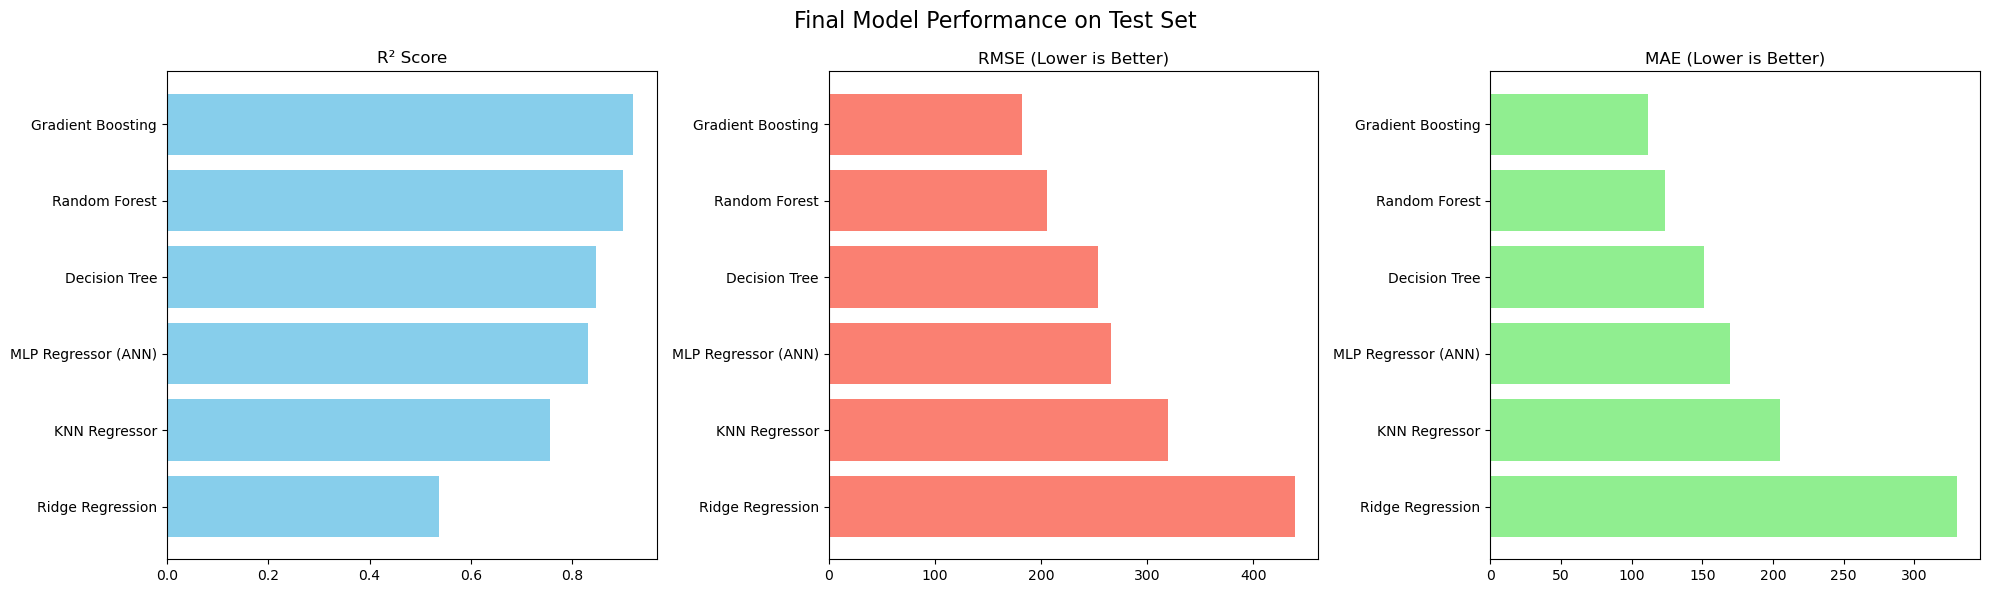


Final Test Set Results:
                     R² Score        RMSE         MAE
Gradient Boosting    0.920212  182.327594  111.421274
Random Forest        0.898869  205.270425  123.990789
Decision Tree        0.845841  253.436174  151.175107
MLP Regressor (ANN)  0.830503  265.744680  169.828899
KNN Regressor        0.755505  319.167435  205.151941
Ridge Regression     0.537202  439.116012  329.945535


In [20]:
final_models = {
    name: model_classes[name](**best_models[name]["Best Params"])
    for name in model_classes
}

# Evaluate models on the test set
results = {}

for name, model in final_models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        "R² Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Convert to DataFrame
df = pd.DataFrame(results).T.sort_values(by='R² Score', ascending=False)

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Final Model Performance on Test Set", fontsize=16)

axs[0].barh(df.index, df['R² Score'], color='skyblue')
axs[0].set_title("R² Score")
axs[0].invert_yaxis()

axs[1].barh(df.index, df['RMSE'], color='salmon')
axs[1].set_title("RMSE (Lower is Better)")
axs[1].invert_yaxis()

axs[2].barh(df.index, df['MAE'], color='lightgreen')
axs[2].set_title("MAE (Lower is Better)")
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()

# Print results
print("\nFinal Test Set Results:")
print(df.to_string())


#### Result Interpretation

- **Gradient Boosting** once again leads — offering the best balance of low error and high accuracy. Its R² of **0.92** confirms it’s both powerful and generalizes well.
- **Random Forest** is a close second, and also highly stable.
- **Decision Tree** and **MLP** show decent performance but fall short of ensemble models.
- **KNN** and **Ridge** lag behind — especially Ridge, which underfits despite tuning.


# Test Run: Predicting Rentals for a Real Scenario

In [21]:
# Step 0: Use best parameters from tuning and fix random_state for consistency
params = best_models["Gradient Boosting"]["Best Params"]
params["random_state"] = 42  # Ensure consistent predictions

final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(**params))
])

# Fit the model
final_model.fit(X_train, y_train)

# Predict on test set
y_test_pred = final_model.predict(X_test)

# Evaluate
print("Model evaluation on test set:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_test_pred):.3f}")

# Step 1: Create a realistic input scenario
new_input = pd.DataFrame([{
    'Hour': 8,
    'Temperature(°C)': 21.0,
    'Humidity(%)': 58,
    'Wind_speed_(m/s)': 2.5,
    'Visibility_(10m)': 1800,
    'Dew_point_temperature(°C)': 13.0,
    'Solar_Radiation_(MJ/m2)': 1.2,
    'Rainfall(mm)': 0.0,
    'Snowfall_(cm)': 0.0,
    'Seasons': 2,
    'Holiday': 0,
    'Functioning_Day': 1,
    'Year': 2025,
    'Month': 7,
    'Day': 20,
    'Day_of_Week': 0,
    'Is_Weekend': 0
}])

# Step 2: Predict
predicted_rentals = final_model.predict(new_input)

# Step 3: Output
print(f"Expected rentals for the scenario: {int(predicted_rentals[0])} bikes")


Model evaluation on test set:
MAE: 111.28
RMSE: 182.13
R²: 0.920
Expected rentals for the scenario: 1086 bikes


# Final Conclusion

When I started this project, I had one central question in mind:

**Can we predict how many bikes will be rented in Seoul at a given hour using just weather and calendar data?**

It sounded simple — almost too simple. But I quickly realized this wasn’t just a technical challenge. It was about translating patterns in human behavior into something quantifiable, actionable, and useful for real-world planning.

---

### The Journey: From Data to Decision-Making

I began with raw hourly rental data from Seoul’s bike-sharing system, coupled with environmental and calendar information. After cleaning and exploring the data, I didn’t just see numbers — I saw routines.

- People ride less when it’s cold or wet.
- Rentals spike like clockwork at 8 AM and 6 PM.
- Weekends look different from weekdays.
- Holidays flatten demand altogether.

These weren't just trends — they were **signatures of how people live and move through the city**.

From there, I tried different modeling approaches. I could’ve gone with classification and bucketed demand into ranges. But that wasn’t the kind of answer I was looking for. I didn’t want to say “expect high demand.” I wanted to say:

> **“Expect 1086 rentals tomorrow at 8 AM if it’s 21°C and sunny.”**

That’s why I chose regression. It gave me the resolution I needed to honor the real-world nature of the problem.

---

### What I Built
After training and comparing several models — from linear regression to neural networks — one model stood out: **Gradient Boosting Regressor**.

It wasn’t just the most accurate (R² = **0.92** on the test set) — it was also the most stable, generalizable, and interpretable.

I validated it through:

- **Cross-validation** (low variance across folds)
- **Learning curves** (clear convergence)
- **Residual plots** (no bias or systematic error)
- **Feature importance** (results that matched human intuition)

Then I tested it with a real-world input:
> 8 AM on a weekday in July, with 21°C, clear skies, and normal conditions.  
> **Predicted demand: 1086 bikes.**

---

### What the Data Revealed

In the end, this wasn’t just a machine learning project. It became a data-driven story about urban behavior:

- **Routine drives demand.** We ride when we commute.
- **Comfort matters.** Weather changes how we move.
- **Behavior is non-linear.** Tree-based models captured that better than anything else.
- **Time and context shape usage.** Holidays and seasons matter more than we think.

---

### Why It Matters

A city like Seoul doesn’t just need forecasts — it needs **insightful, operationally useful intelligence**.

This model can help with:
- **Fleet rebalancing**
- **Staff scheduling**
- **Predictive maintenance**
- **Targeted promotions**

It can turn daily planning into a **proactive**, data-informed process — one that keeps the city running smoothly and sustainably.

---

### Final Reflection

Bike rentals aren’t random.  
They’re shaped by time, temperature, and context.

And now, thanks to this project —  
**They’re predictable.**
